In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
# Paths
# path = "./training_metrics_epsilon_0.9995.csv"
path = "./training_metrics.csv"

training_metrics_df = pd.read_csv(path)

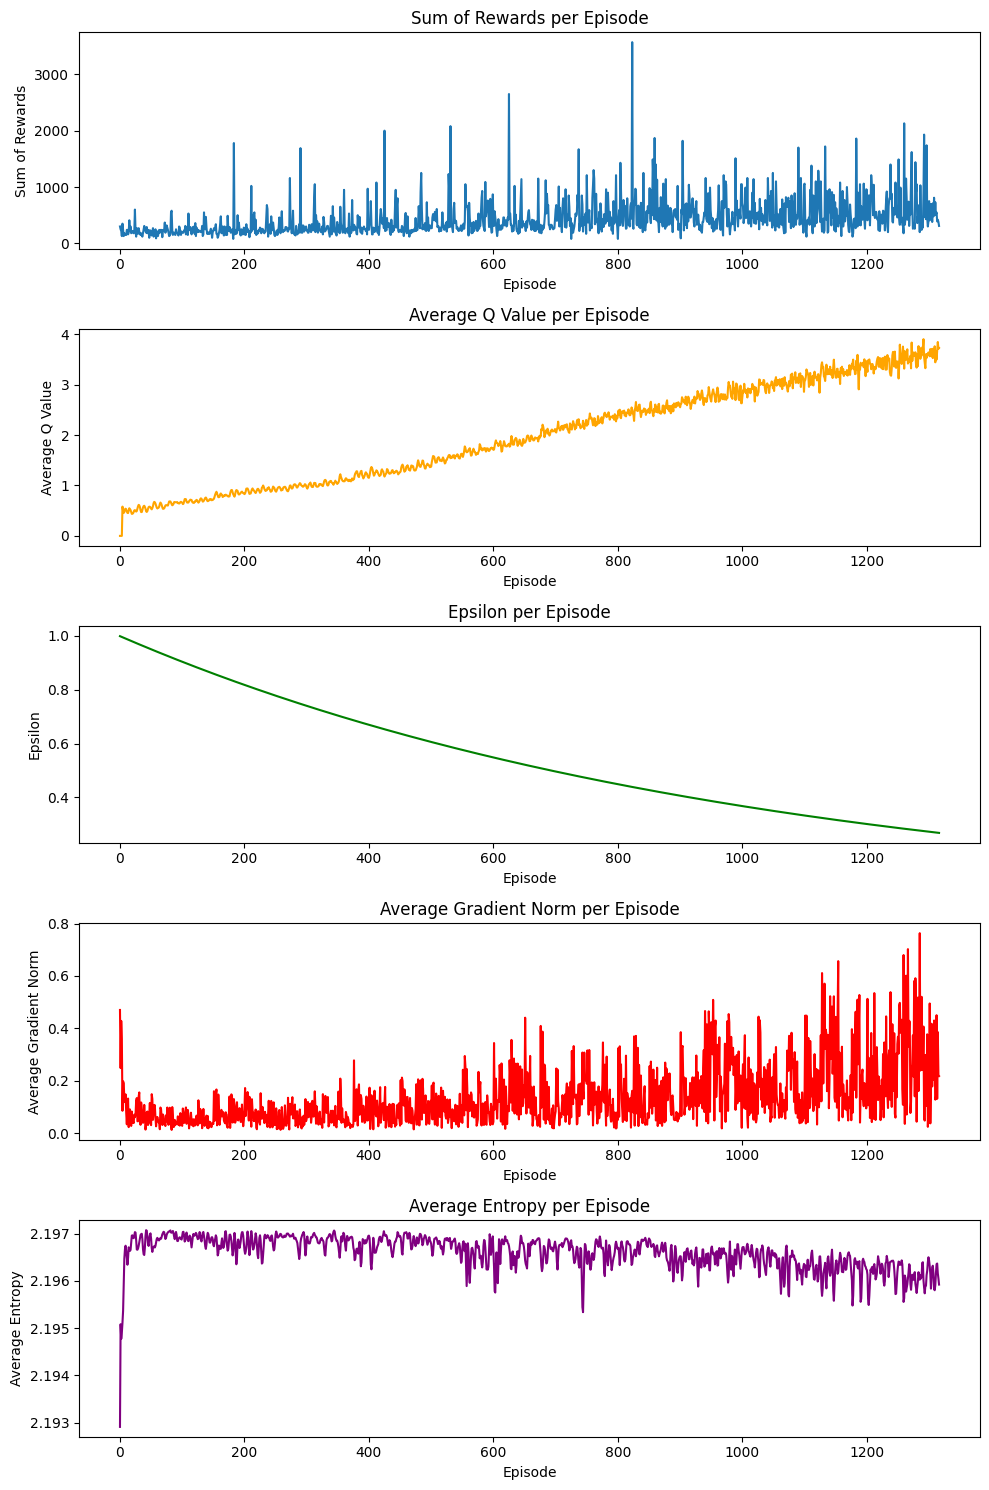

In [23]:
# Plotting key metrics over the episodes
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

# Sum of rewards per episode
axs[0].plot(training_metrics_df['episode'], training_metrics_df['sum_reward'], label='Sum of Rewards')
axs[0].set_title('Sum of Rewards per Episode')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Sum of Rewards')

# Average Q value per episode
axs[1].plot(training_metrics_df['episode'], training_metrics_df['average_q_value'], label='Average Q Value', color='orange')
axs[1].set_title('Average Q Value per Episode')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Average Q Value')

# Epsilon per episode
axs[2].plot(training_metrics_df['episode'], training_metrics_df['epsilon'], label='Epsilon', color='green')
axs[2].set_title('Epsilon per Episode')
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Epsilon')

# Average gradient norm per episode
axs[3].plot(training_metrics_df['episode'], training_metrics_df['average_gradient_norm'], label='Average Gradient Norm', color='red')
axs[3].set_title('Average Gradient Norm per Episode')
axs[3].set_xlabel('Episode')
axs[3].set_ylabel('Average Gradient Norm')

# Average entropy per episode
axs[4].plot(training_metrics_df['episode'], training_metrics_df['average_entropy'], label='Average Entropy', color='purple')
axs[4].set_title('Average Entropy per Episode')
axs[4].set_xlabel('Episode')
axs[4].set_ylabel('Average Entropy')

# Display the plots
plt.tight_layout()
plt.show()

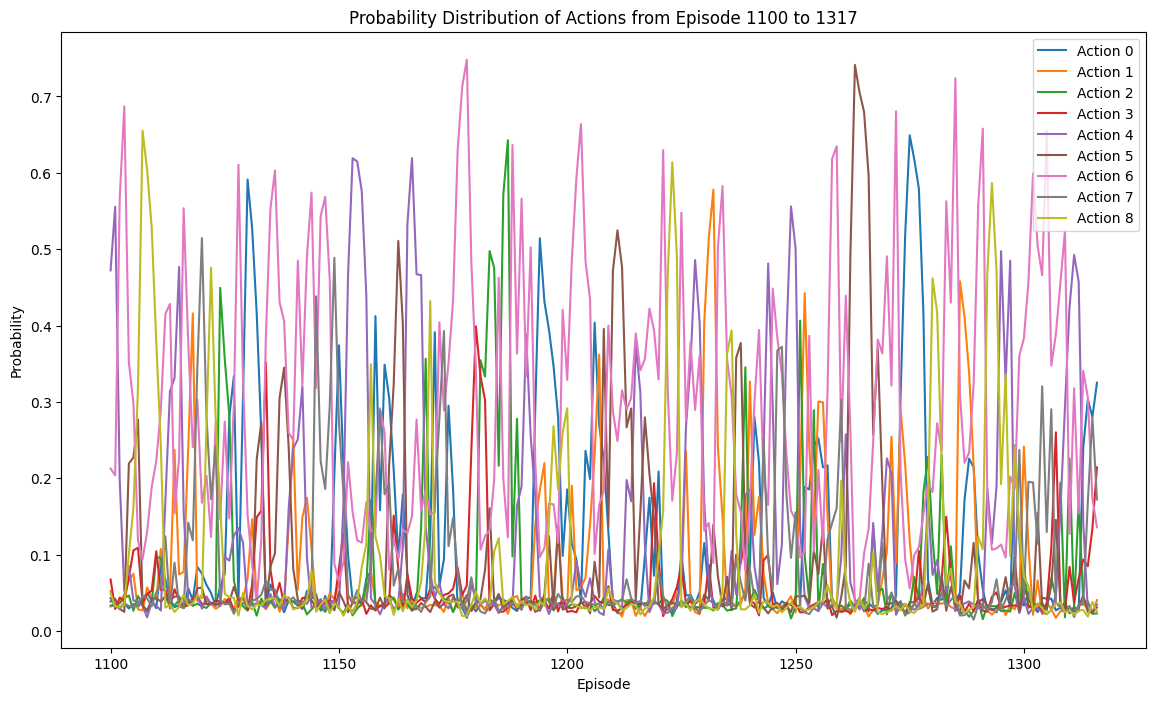

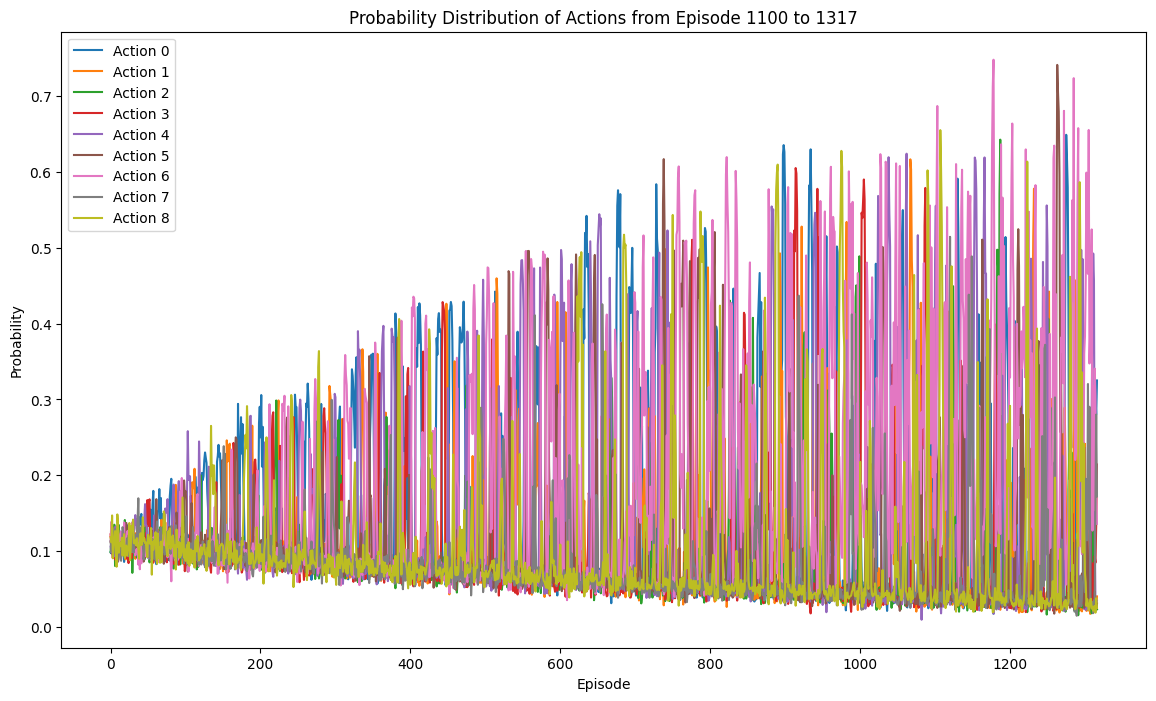

In [24]:
# Function to convert string list representations to actual lists
def str_to_list(action_str):
    if isinstance(action_str, str):
        return eval(action_str)
    return action_str

# Apply the function to convert the 'actions' column from strings to lists
training_metrics_df['actions'] = training_metrics_df['actions'].apply(str_to_list)

# Group the actions by each episode
grouped_actions = training_metrics_df.groupby(training_metrics_df.index)['actions']

# Calculate the probability distributions for each action per episode
prob_distributions = grouped_actions.apply(
    lambda x: pd.Series([action for sublist in x for action in sublist]).value_counts(normalize=True)
)

# Unstack the groupby object to create a DataFrame and fill missing values with 0
prob_distribution_df = prob_distributions.unstack().fillna(0)

# Transpose the DataFrame to have actions on the y-axis and episodes on the x-axis for plotting
prob_distribution_transposed = prob_distribution_df.T

# Function to plot the action distribution for a given range of episodes
def plot_action_distribution(start_episode, end_episode, restrict_range=False):
    # If restricting range, select the specified range of episodes to plot
    if restrict_range:
        # Validate the episode range
        if start_episode < 0 or end_episode > len(prob_distribution_transposed.columns):
            raise ValueError("Invalid range for episodes. Please choose a valid range within the dataset.")
        episodes_to_plot = prob_distribution_transposed.columns[start_episode:end_episode]
    else:
        # If not restricting range, select all episodes
        episodes_to_plot = prob_distribution_transposed.columns

    # Plot the probability distributions over the selected range of episodes
    plt.figure(figsize=(14, 8))
    for action in prob_distribution_transposed.index:
        plt.plot(episodes_to_plot, prob_distribution_transposed.loc[action, episodes_to_plot], label=f'Action {action}')

    plt.xlabel('Episode')
    plt.ylabel('Probability')
    plt.title(f'Probability Distribution of Actions from Episode {start_episode} to {end_episode}')
    plt.legend()
    plt.show()

# Example usage:
start_episode = 1100
end_episode = len(training_metrics_df)
# Set restrict_range to True to plot only the episodes between start_episode and end_episode
plot_action_distribution(start_episode, end_episode, restrict_range=True)

# Set restrict_range to False to plot all episodes
plot_action_distribution(start_episode, end_episode, restrict_range=False)

In [25]:
# import gym
# import numpy as np

# # Create the RAM environment
# env = gym.make('MsPacman-ram-v0')

# # Start a new game
# state = env.reset()
# print(f"Initial state type: {type(state)}")

# # Take a step to change the game state
# next_state, reward, truncated, terminated, info = env.step(env.action_space.sample())
# print(f"Next state type: {type(next_state)}")

# # Try to print the states directly
# print(f"Initial state: {state}")
# print(f"Next state: {next_state}")

# # If the states are simple lists or arrays, we can convert them to NumPy arrays
# if isinstance(state, (list, np.ndarray)) and isinstance(next_state, (list, np.ndarray)):
#     state_array = np.array(state)
#     next_state_array = np.array(next_state)
# else:
#     print("States are not simple lists or numpy arrays.")

# # Compare the RAM states to see what has changed
# # Ensure you're only comparing if both states are NumPy arrays
# if 'state_array' in locals() and 'next_state_array' in locals():
#     changes = next_state_array - state_array
#     changed_indices = np.where(changes != 0)[0]

#     print(f"Changed RAM locations: {changed_indices}")
#     print(f"New values in those locations: {next_state_array[changed_indices]}")
#     print(f"Change in values: {changes[changed_indices]}")

In [26]:
# # Create the RAM environment
# env = gym.make('MsPacman-ram-v0', render_mode="human")

In [27]:
# # Start a new game
# initial_state = env.reset()
# state = initial_state[0]  # Extract the NumPy array part of the initial state
# print(f"Initial state type: {type(state)}")

In [28]:
# # Take a step to change the game state
# next_state, reward, truncated, terminated, info = env.step(env.action_space.sample())
# print(f"Next state type: {type(next_state)}")

# # Now both 'state' and 'next_state' are NumPy arrays, and we can compare them directly
# changes = next_state - state
# changed_indices = np.where(changes != 0)[0]

# print(f"Changed RAM locations: {changed_indices}")
# print(f"New values in those locations: {next_state[changed_indices]}")
# print(f"Change in values: {changes[changed_indices]}")

In [29]:
# env.close()